Hanya untuk tes aja

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [2]:
scores = pd.read_csv("./scores.csv")
scores

No  GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  \
0            0   60894    8419.0     Reduxx             Boos     jett  313.0   
1            1   60894     466.0     ChurmZ             Boos  chamber  227.0   
2            2   60894    3712.0   diaamond             Boos     sova  226.0   
3            3   60894    5099.0     Boltzy             Boos    viper  218.0   
4            4   60894    3983.0     Virtyy             Boos     skye   80.0   
...        ...     ...       ...        ...              ...      ...    ...   
128774  157934      13      24.0      Gover              NaN      NaN    0.0   
128775  157935      13      25.0      Jack1              NaN      NaN    0.0   
128776  157936      13      26.0     Rewind              NaN      NaN    0.0   
128777  157937      13      27.0      Woo1y              NaN      NaN    0.0   
128778  157938      13      28.0    DrasseL              NaN      NaN    0.0   

        Kills  Deaths  Assists  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0        24.0    10.0      3.0  ...      2.0      0.0      1.0      0.0   
1        16.0    10.0      7.0  ...      0.0      0.0      0.0      0.0   
2        17.0     9.0      8.0  ...      0.0      0.0      1.0      0.0   
3        17.0    12.0      2.0  ...      0.0      0.0      1.0      0.0   
4         5.0    13.0      3.0  ...      0.0      0.0      0.0      0.0   
...       ...     ...      ...  ...      ...      ...      ...      ...   
128774    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128775    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128776    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128777    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128778    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
128774        NaN       NaN       NaN   NaN     NaN      NaN  
128775        NaN       NaN       NaN   NaN     NaN      NaN  
128776        NaN       NaN       NaN   NaN     NaN      NaN  
128777        NaN       NaN       NaN   NaN     NaN      NaN  
128778        NaN       NaN       NaN   NaN     NaN      NaN  

[128779 rows x 29 columns]

In [8]:
kill_death = scores.groupby(['Agent'])[['Kills', 'Deaths']].mean()
kill_death

Kills     Deaths
Agent                          
astra      13.907845  14.019650
breach     12.658453  14.431673
brimstone  13.564274  14.589511
chamber    15.276730  13.716981
cypher     13.684723  14.417095
jett       16.580506  15.056124
kayo       13.528389  14.529548
killjoy    14.090251  14.164613
omen       13.810811  14.541820
phoenix    15.619208  15.078068
raze       16.166794  15.319378
reyna      16.436460  15.206579
sage       13.721862  14.369330
skye       13.830868  14.613197
sova       13.731012  13.831836
viper      13.919649  14.230319
yoru       15.343373  15.632530

<Axes: xlabel='Agent'>

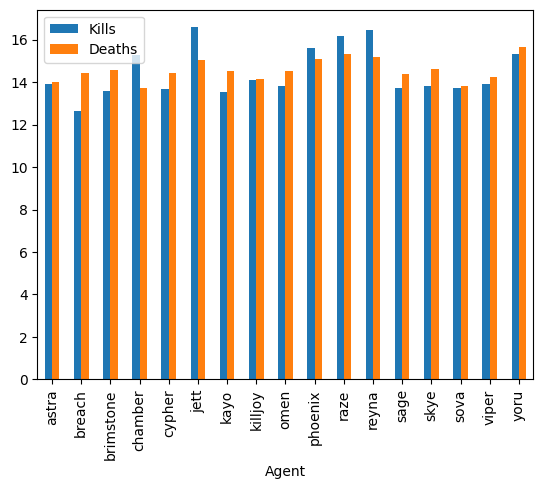

In [18]:
kill_death.plot.bar(rot=90)

In [8]:
print(scores.shape)

check = scores[["Kills", "ACS", "Deaths"]].isnull().sum()
check

# for i in check:
#     print(i)

(128779, 29)


Kills     490
ACS       530
Deaths    490
dtype: int64

In [22]:
nonnull_da = scores[["Agent", "ACS"]].dropna()
nonnull_da

Agent    ACS
0            jett  313.0
1         chamber  227.0
2            sova  226.0
3           viper  218.0
4            skye   80.0
...           ...    ...
127989       sage  312.0
127990    phoenix  255.0
127991     cypher  240.0
127992       sova  163.0
127993  brimstone  133.0

[124514 rows x 2 columns]

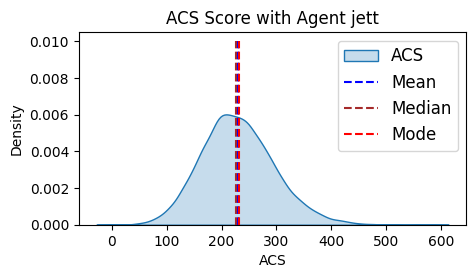

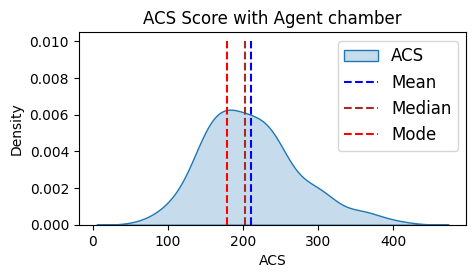

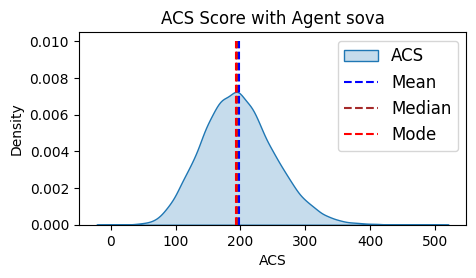

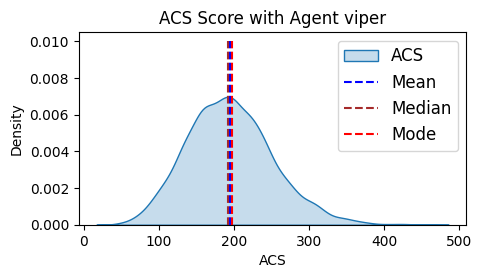

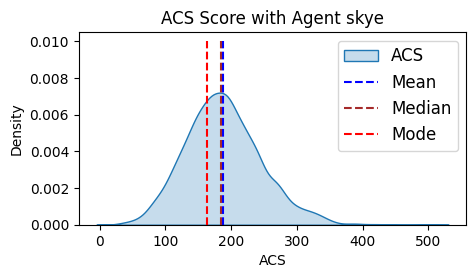

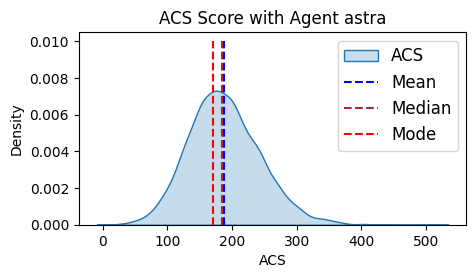

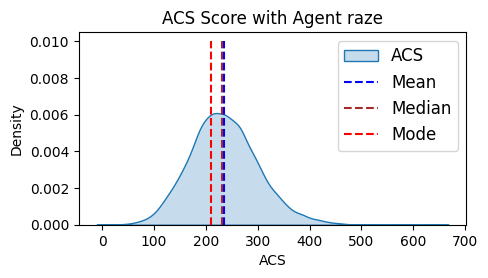

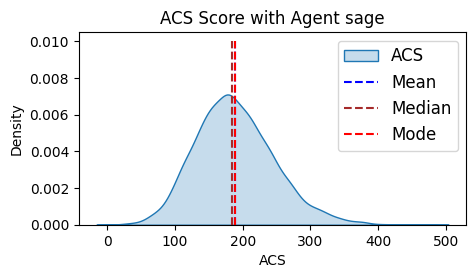

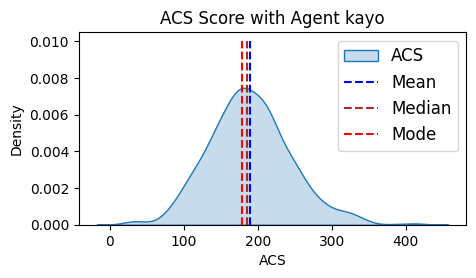

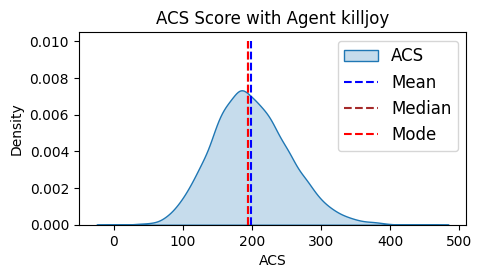

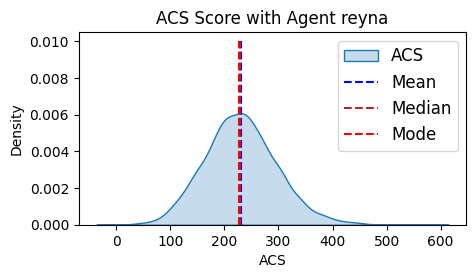

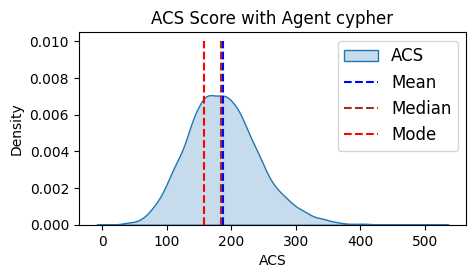

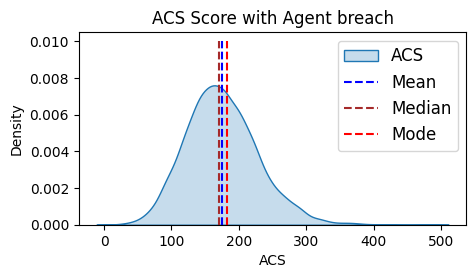

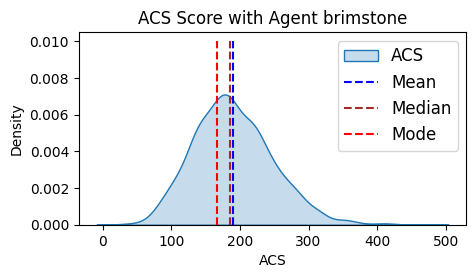

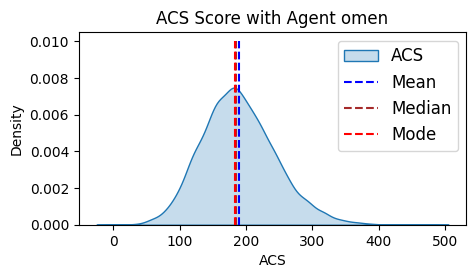

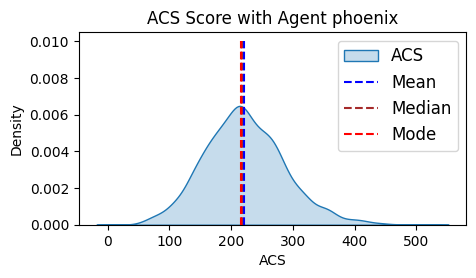

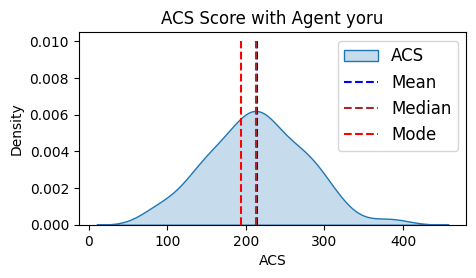

In [27]:
for i in (nonnull_da['Agent'].unique()):
    plot = (nonnull_da[nonnull_da['Agent'] == i])["ACS"]
    plt.figure(figsize=(5,2.5))
    plt.title(f"ACS Score with Agent {i}")
    sns.kdeplot(plot, fill=True)
    plt.vlines(x=np.mean(plot), ymin=0, ymax=0.01, color='blue', linestyle='--')
    plt.vlines(x=np.median(plot), ymin=0, ymax=0.01, color='brown', linestyle='--')
    plt.vlines(x=scp.mode(plot)[0], ymin=0, ymax=0.01, color='red', linestyle='--')
    plt.legend(["ACS", 'Mean', 'Median', 'Mode'], fontsize=12)
    plt.show()


In [12]:
games = pd.read_csv("./games.csv")
games

No  GameID  MatchID     Map  Team1ID  Team2ID                Team1  \
0          0   60894    62393  Breeze     6903     6020  Booster Seat Gaming   
1          1   60895    62393    Bind     6903     6020  Booster Seat Gaming   
2          2   60896    62393   Haven     6903     6020  Booster Seat Gaming   
3          3   60924    62403  Icebox     7046     7047       Bjor's Kittens   
4          4   60925    62403   Haven     7046     7047       Bjor's Kittens   
...      ...     ...      ...     ...      ...      ...                  ...   
12956  15883       6       10   Haven        4       11                smoke   
12957  15884       8       12    Bind       10        8           Highground   
12958  15885       4        8   Haven        4        6                smoke   
12959  15886       3        7   Split        4        5                smoke   
12960  15887      13       17    Bind        7        8            Dignitas    

                    Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
0                Pho Real       1        2.0            0.0            5.0   
1                Pho Real       2        3.0            3.0            5.0   
2                Pho Real       1        2.0            2.0            5.0   
3                Mugiwara       1        2.0            2.0            4.0   
4                Mugiwara       1        4.0            2.0            3.0   
...                   ...     ...        ...            ...            ...   
12956       Obey Alliance       2        NaN            NaN            NaN   
12957                 JSD       2        NaN            NaN            NaN   
12958             Orgless       2        NaN            NaN            NaN   
12959  Last Minute Heroes       2        NaN            NaN            NaN   
12960                 JSD       2        NaN            NaN            NaN   

       Team1_FullBuy  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
0               13.0                 13        4.0            2.0   
1                4.0                  2        2.0            0.0   
2               12.0                 13        2.0            2.0   
3               11.0                 13        4.0            1.0   
4               13.0                 13        3.0            3.0   
...              ...                ...        ...            ...   
12956            NaN                  0        NaN            NaN   
12957            NaN                  0        NaN            NaN   
12958            NaN                  0        NaN            NaN   
12959            NaN                  0        NaN            NaN   
12960            NaN                  0        NaN            NaN   

       Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
0                4.0           10.0                  7  
1                4.0            9.0                 13  
2                6.0           11.0                  8  
3                2.0           12.0                  6  
4                4.0           12.0                  9  
...              ...            ...                ...  
12956            NaN            NaN                  0  
12957            NaN            NaN                  0  
12958            NaN            NaN                  0  
12959            NaN            NaN                  0  
12960            NaN            NaN                  0  

[12961 rows x 19 columns]

In [45]:
scores_reduction = scores[["Agent", "ACS", "GameID"]]
games_reduction = games[["GameID", "Map"]]

merge = pd.merge(scores_reduction, games_reduction, on='GameID')
merge_nonnull = merge.dropna()
merge_nonnull

Agent    ACS  GameID     Map
0            jett  313.0   60894  Breeze
1         chamber  227.0   60894  Breeze
2            sova  226.0   60894  Breeze
3           viper  218.0   60894  Breeze
4            skye   80.0   60894  Breeze
...           ...    ...     ...     ...
127934       sage  312.0     221   Haven
127935    phoenix  255.0     221   Haven
127936     cypher  240.0     221   Haven
127937       sova  163.0     221   Haven
127938  brimstone  133.0     221   Haven

[124459 rows x 4 columns]

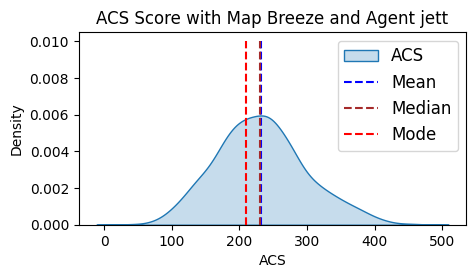

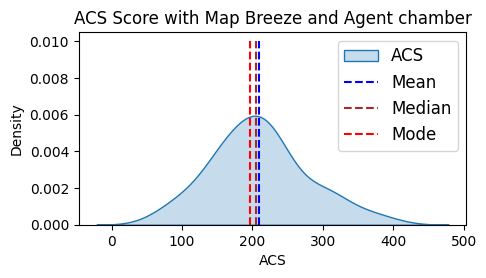

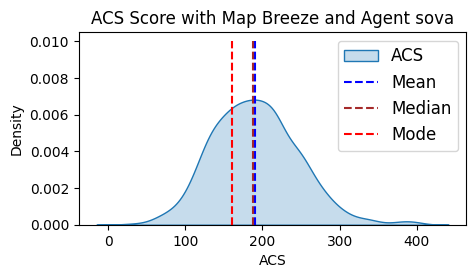

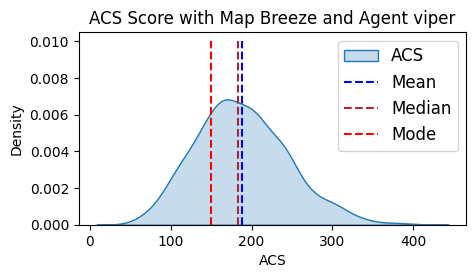

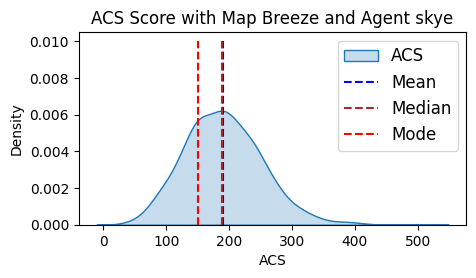

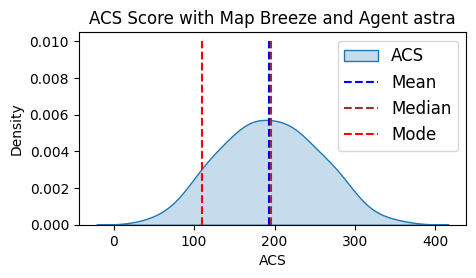

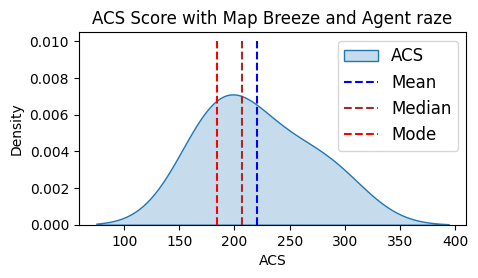

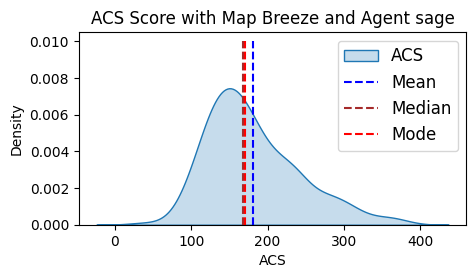

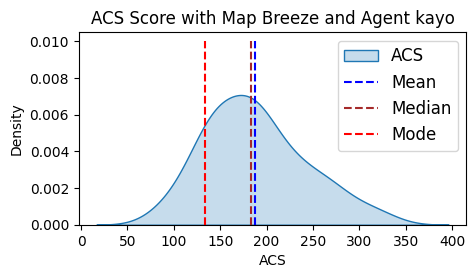

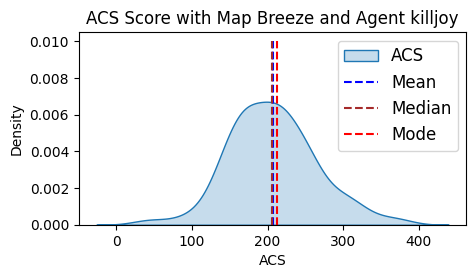

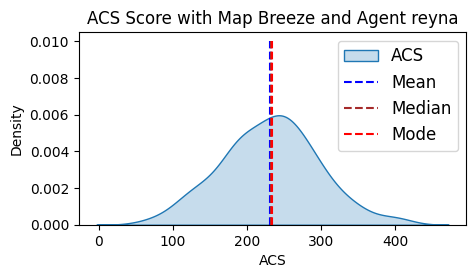

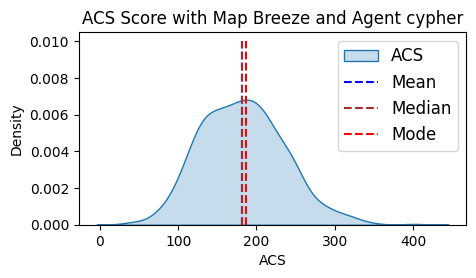

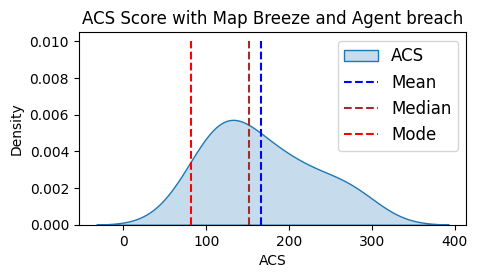

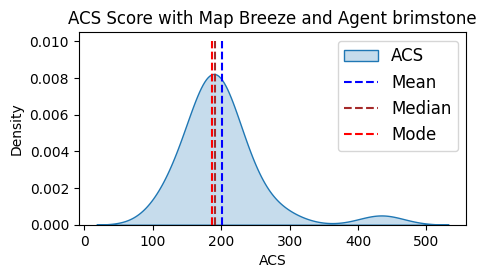

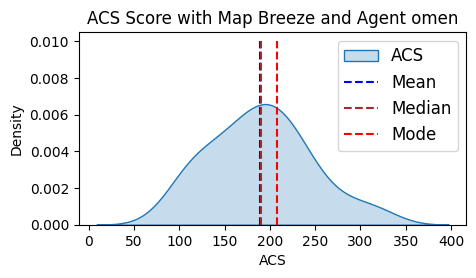

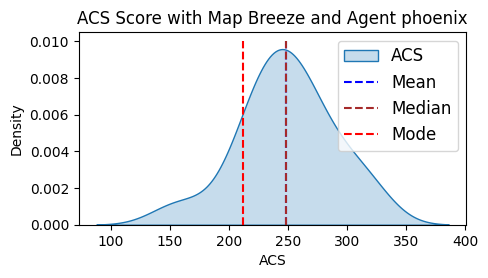

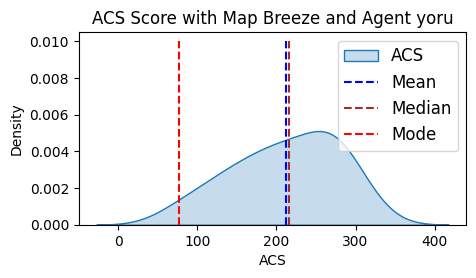

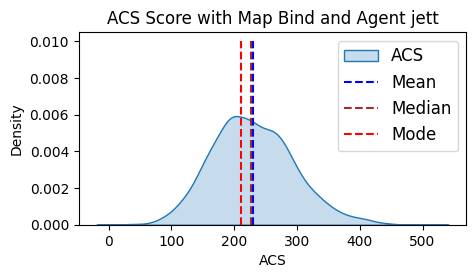

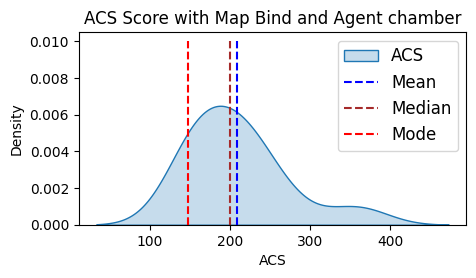

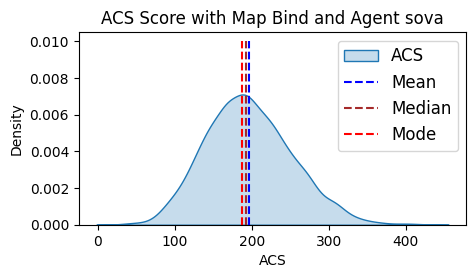

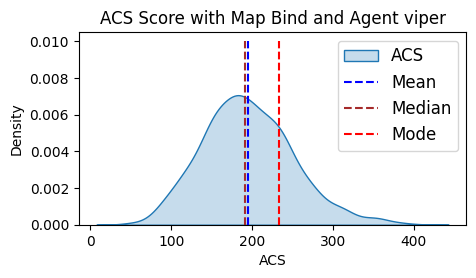

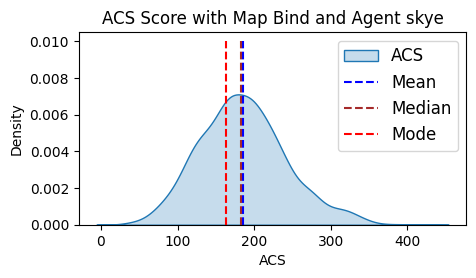

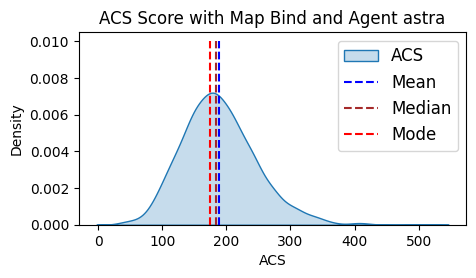

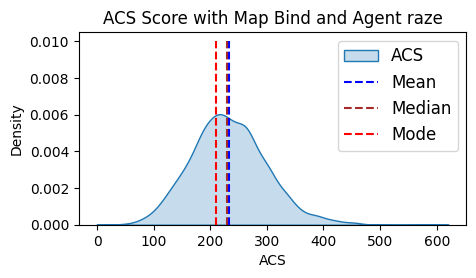

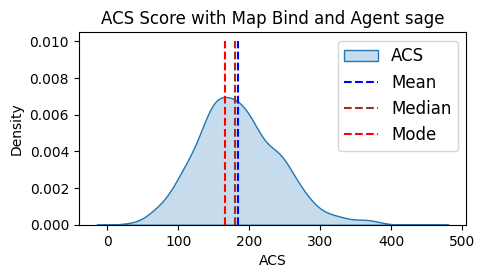

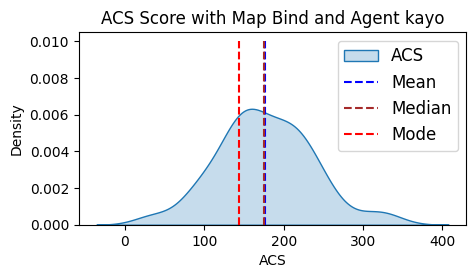

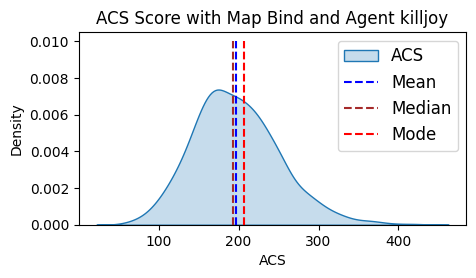

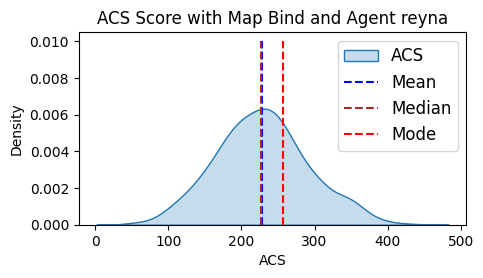

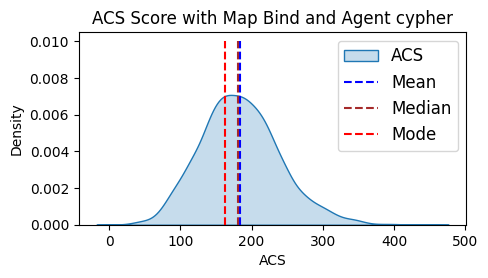

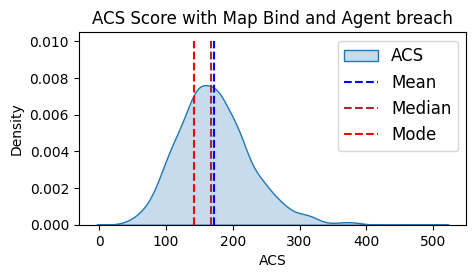

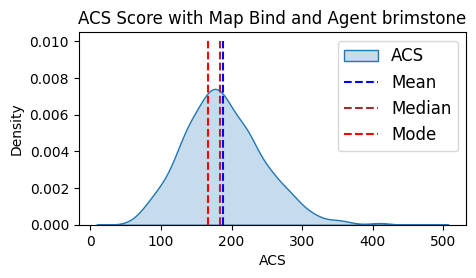

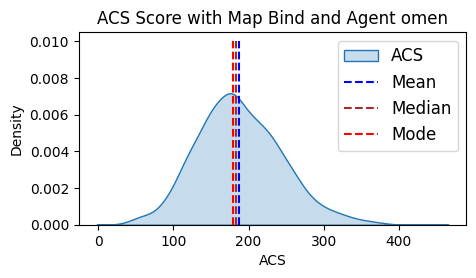

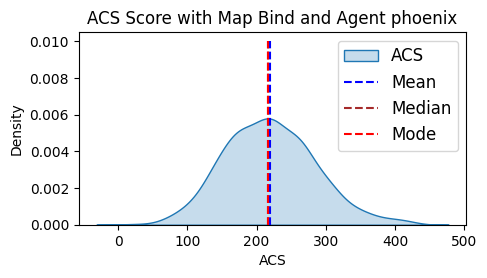

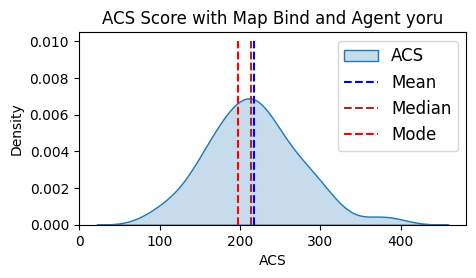

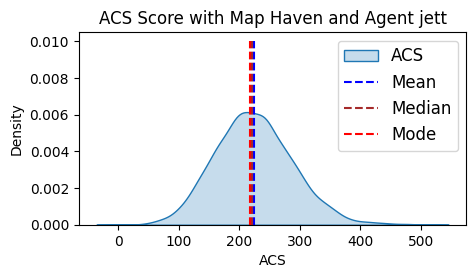

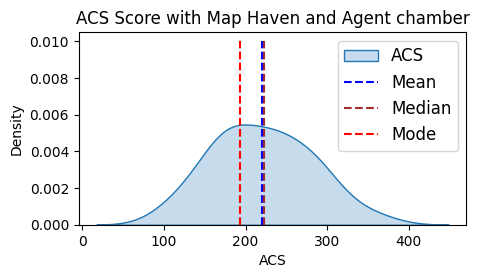

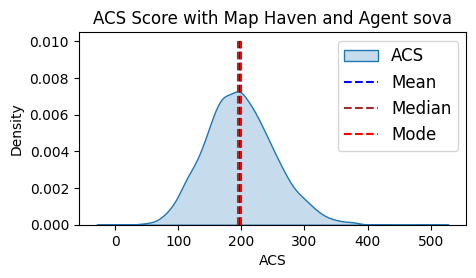

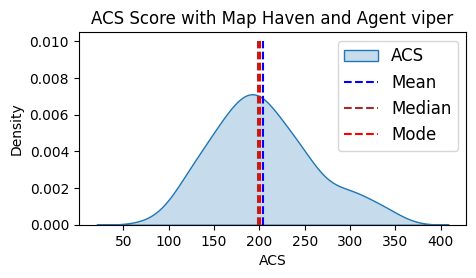

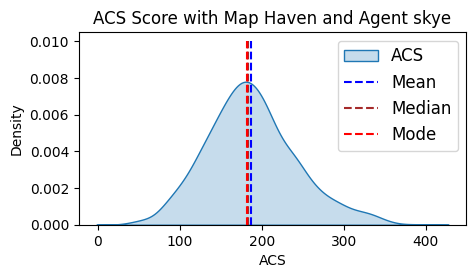

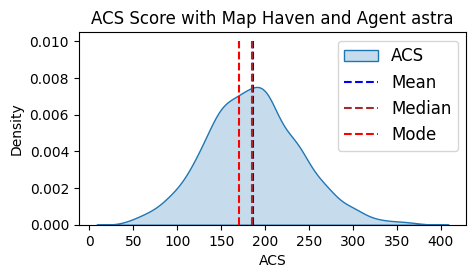

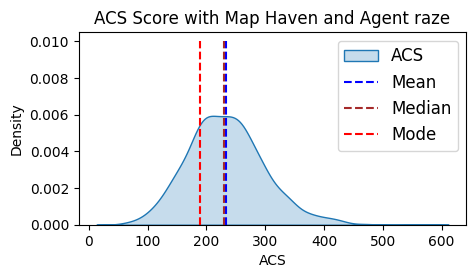

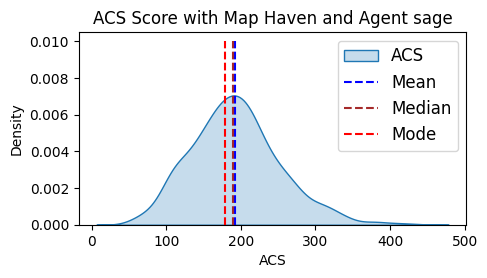

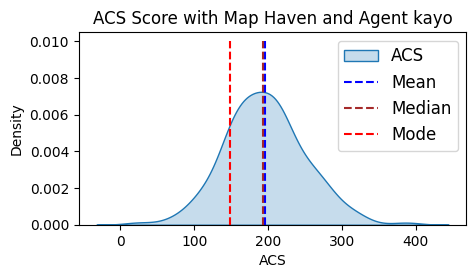

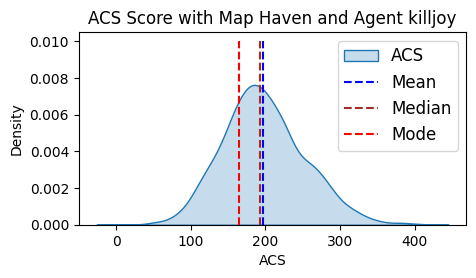

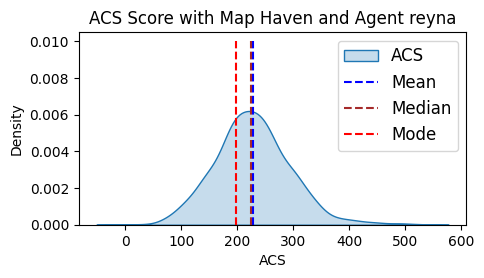

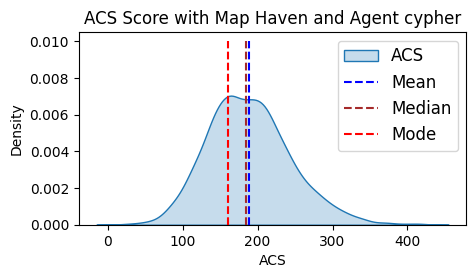

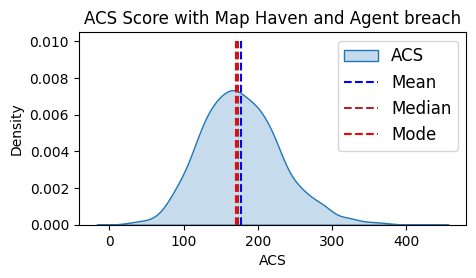

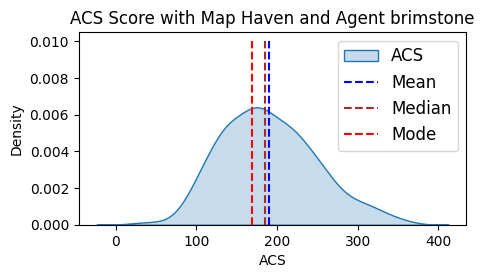

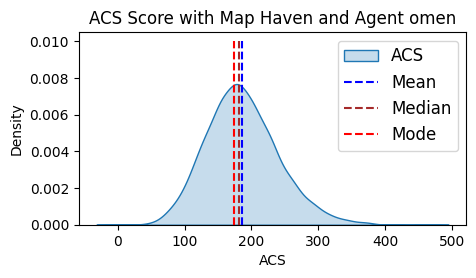

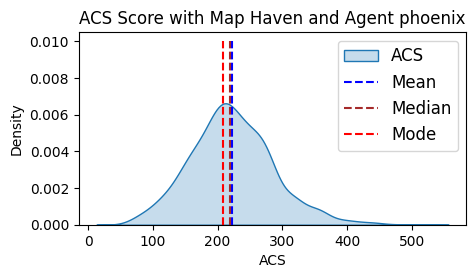

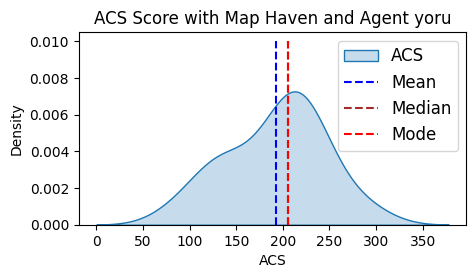

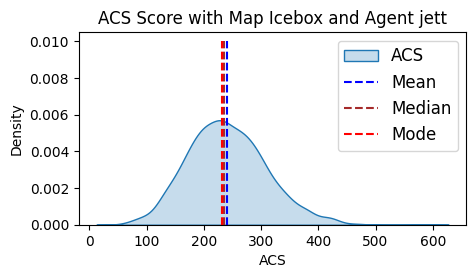

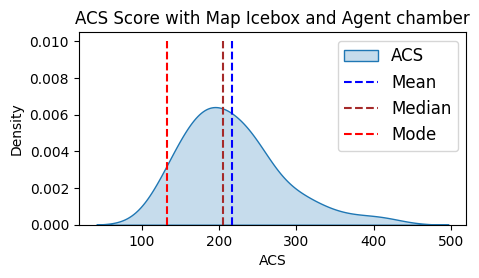

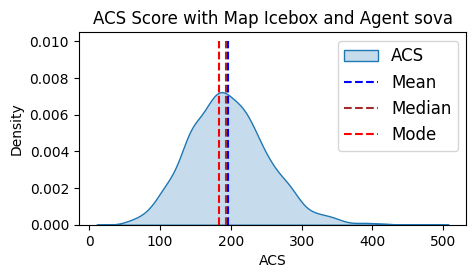

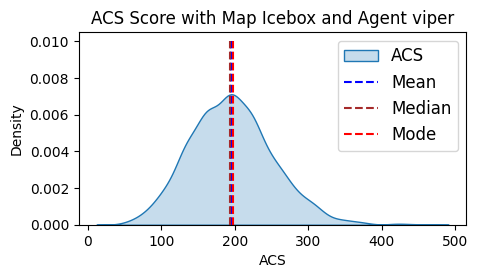

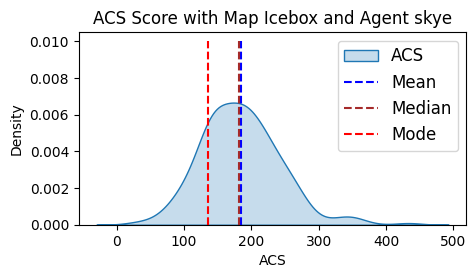

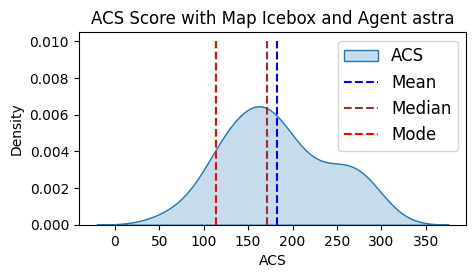

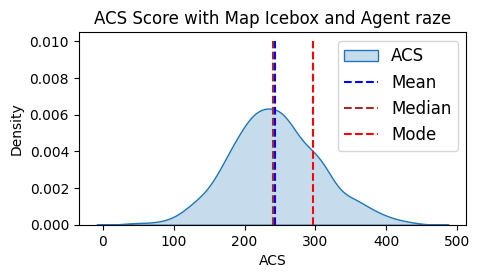

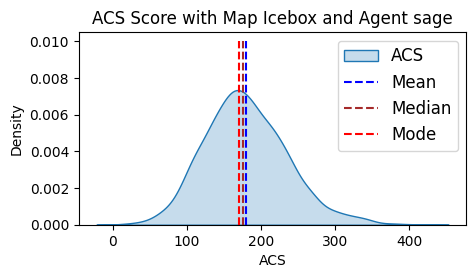

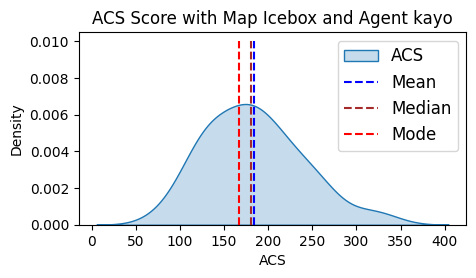

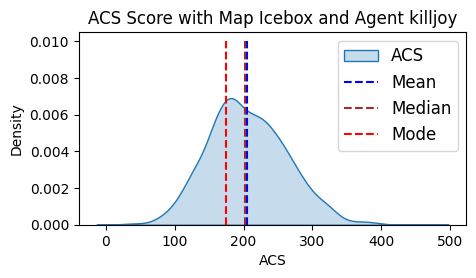

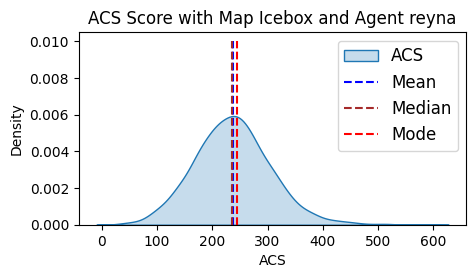

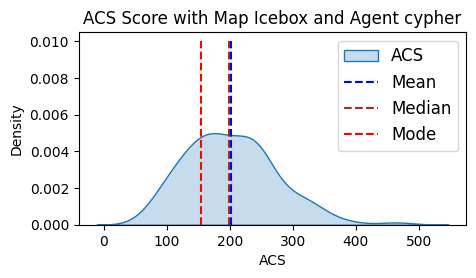

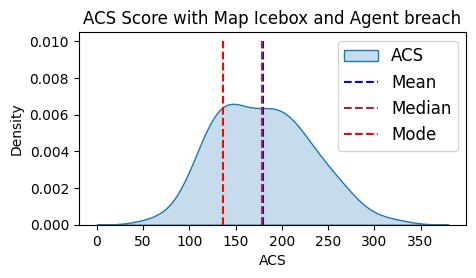

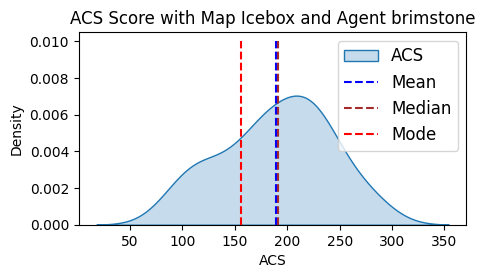

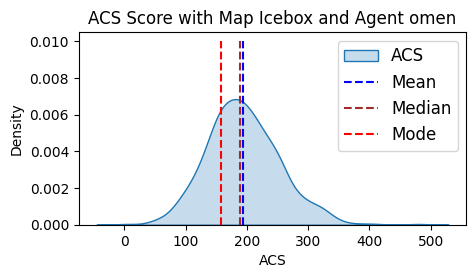

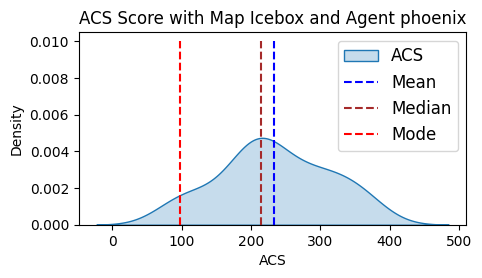

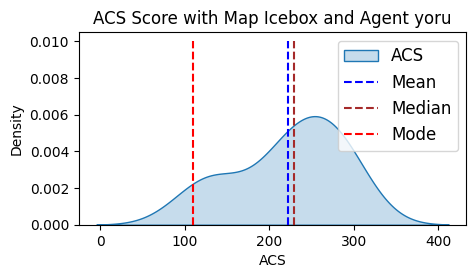

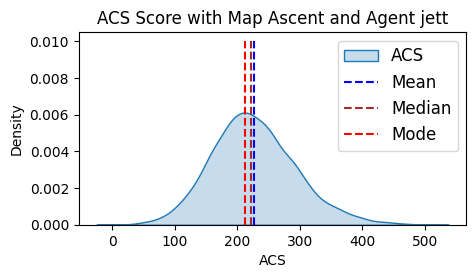

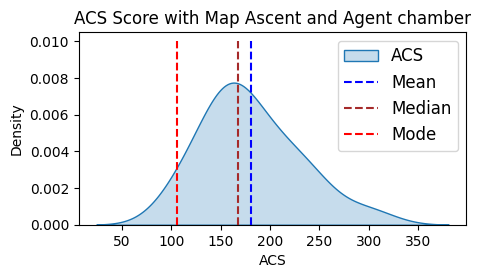

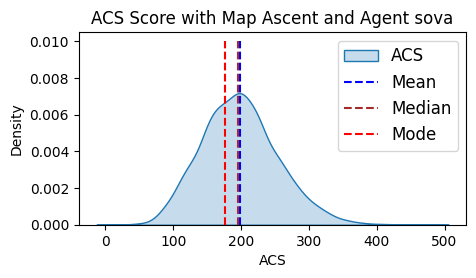

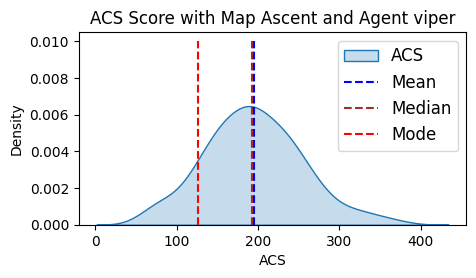

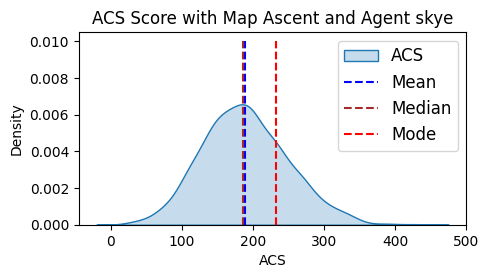

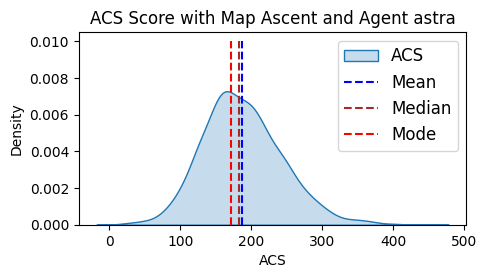

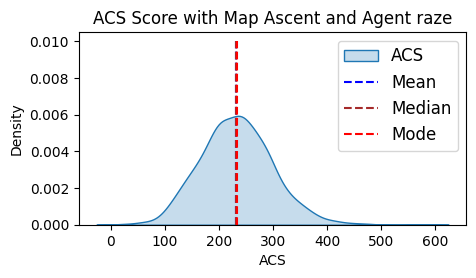

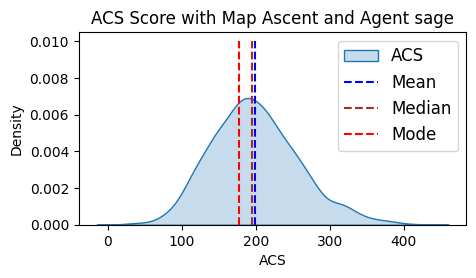

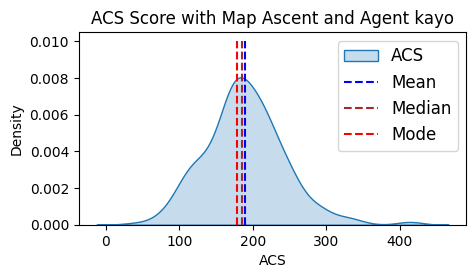

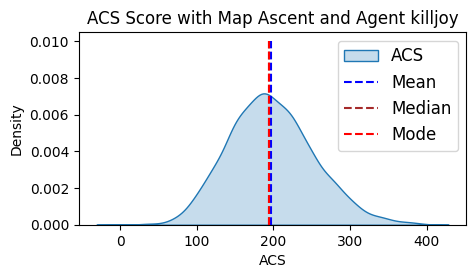

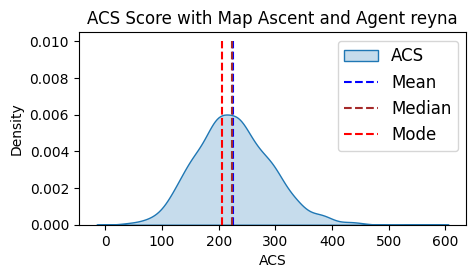

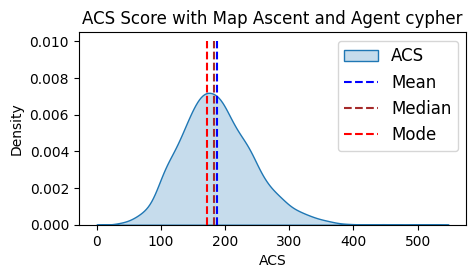

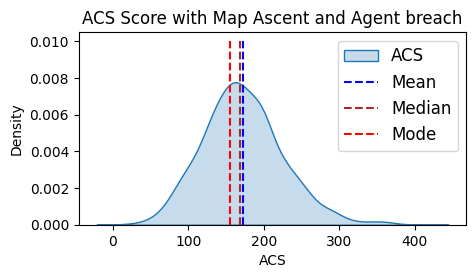

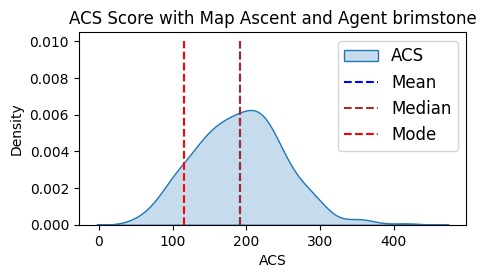

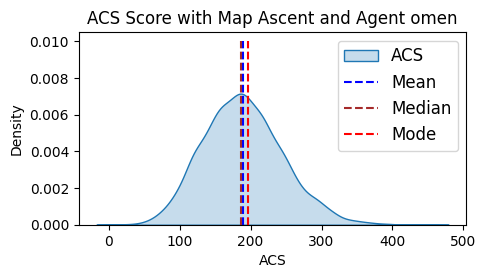

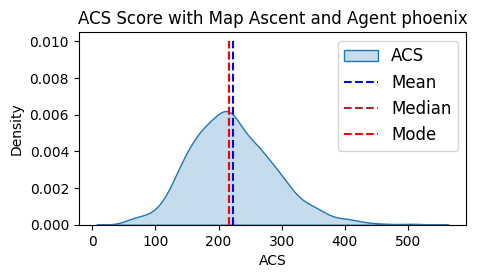

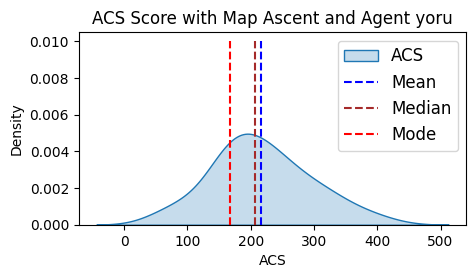

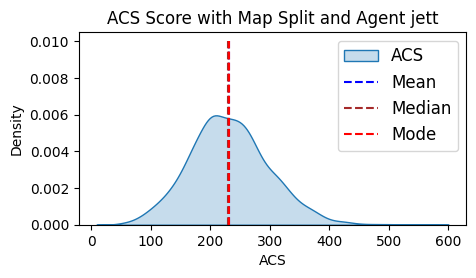

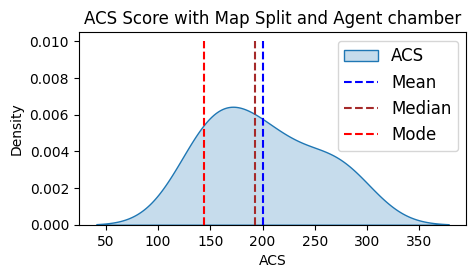

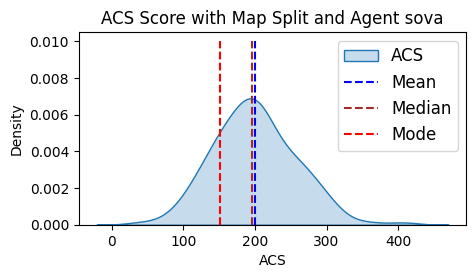

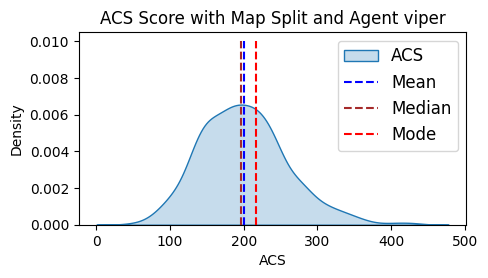

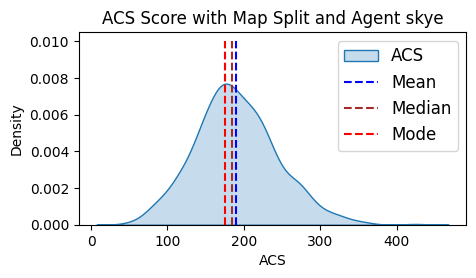

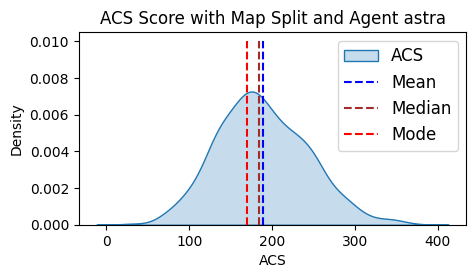

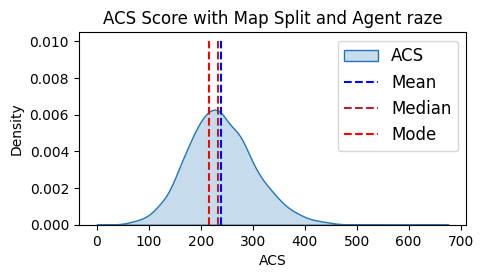

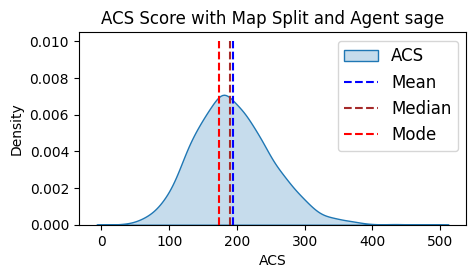

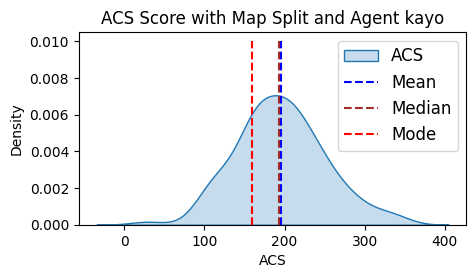

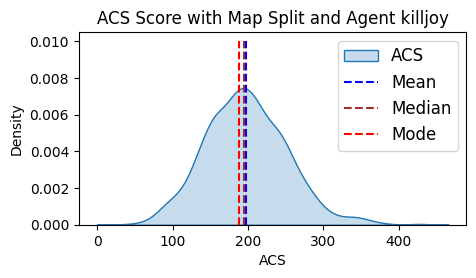

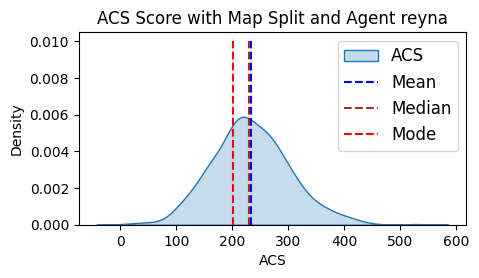

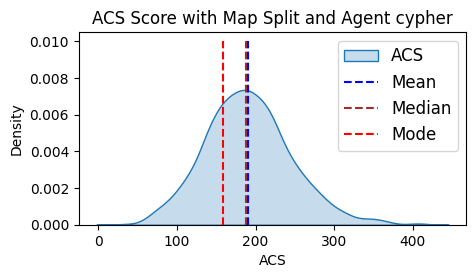

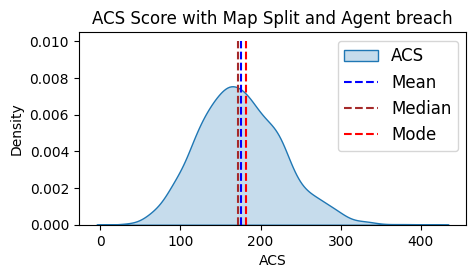

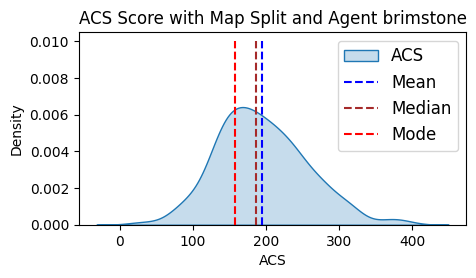

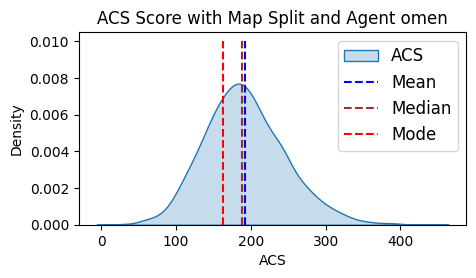

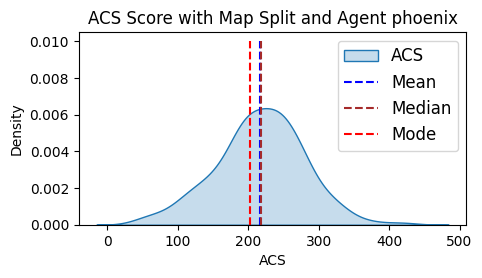

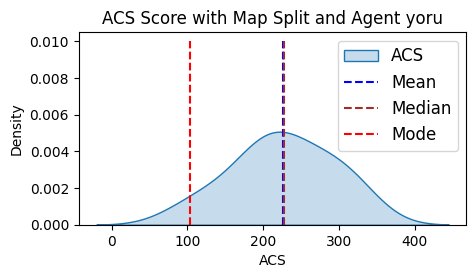

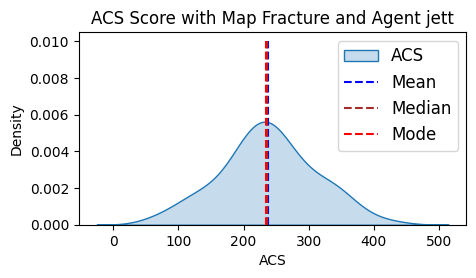

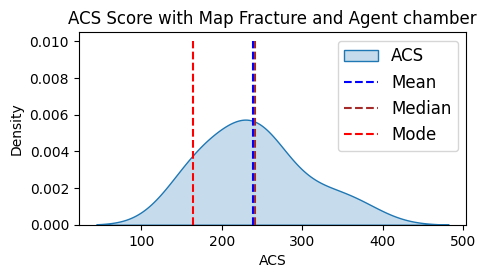

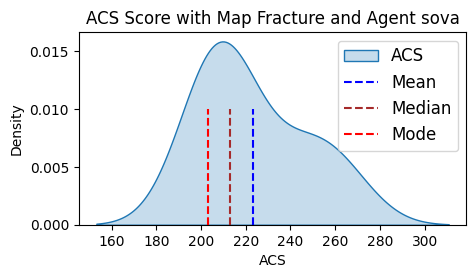

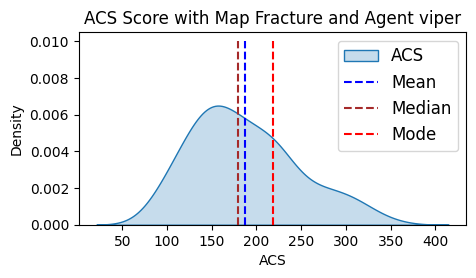

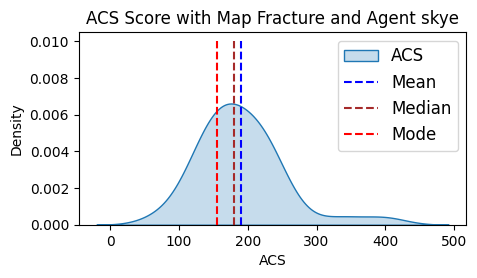

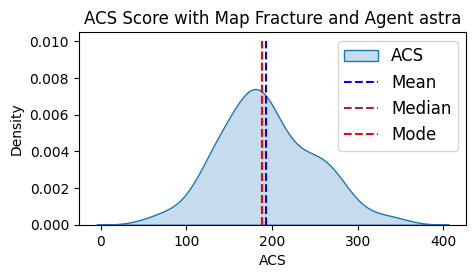

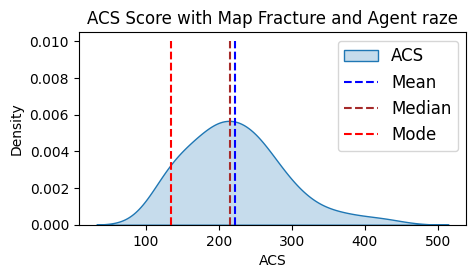

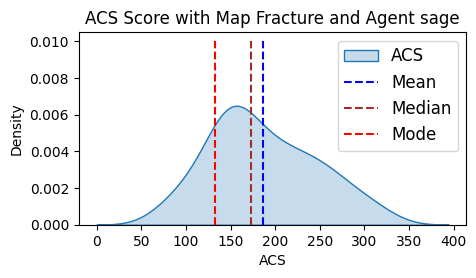

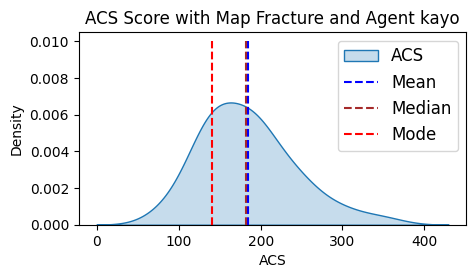

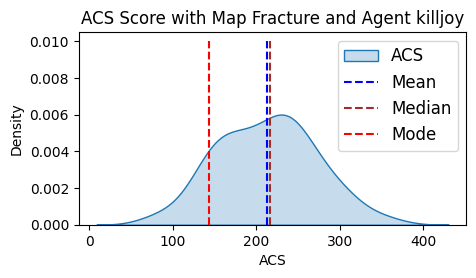

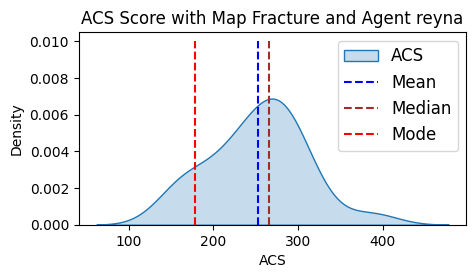

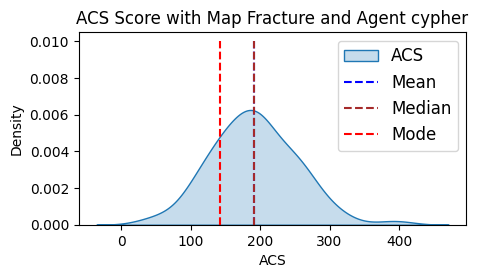

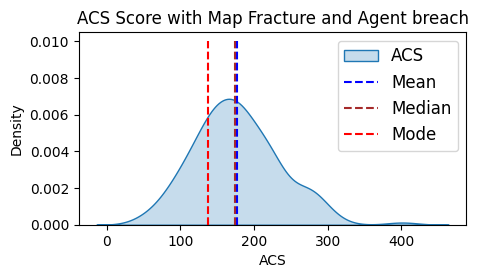

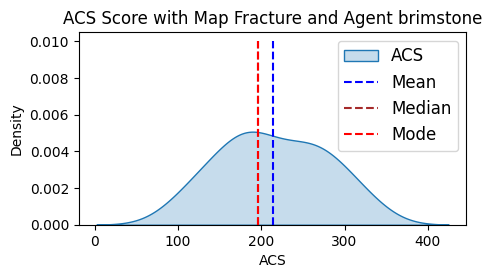

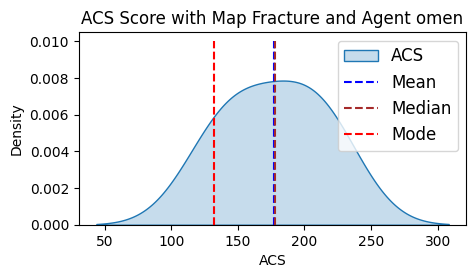

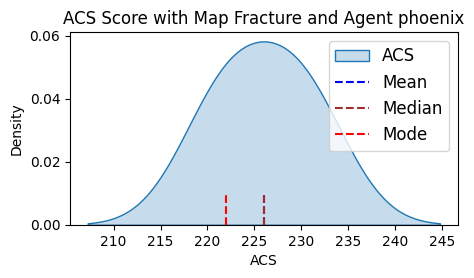

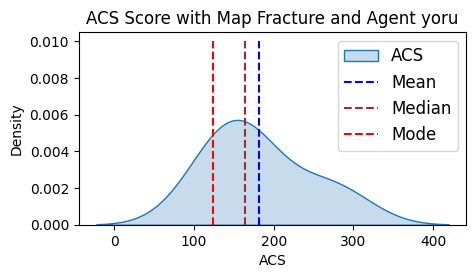

In [28]:
for i in (merge_nonnull['Map'].unique()):
    for j in (merge_nonnull['Agent'].unique()):
        # plot = (nonnull_da[nonnull_da['Agent'] == i])["ACS"]
        plot = merge_nonnull[(merge_nonnull['Agent'] == j) & (merge_nonnull['Map'] == i)]["ACS"]
        # print(plot)
        plt.figure(figsize=(5,2.5))
        plt.title(f"ACS Score with Map {i} and Agent {j}")
        sns.kdeplot(plot, fill=True)
        plt.vlines(x=np.mean(plot), ymin=0, ymax=0.01, color='blue', linestyle='--')
        plt.vlines(x=np.median(plot), ymin=0, ymax=0.01, color='brown', linestyle='--')
        plt.vlines(x=scp.mode(plot)[0], ymin=0, ymax=0.01, color='red', linestyle='--')
        plt.legend(["ACS", 'Mean', 'Median', 'Mode'], fontsize=12)
        plt.show()


In [13]:
sco_red = scores[["Agent", "Kills",	"Deaths", "GameID"]]
gam_red = games[["GameID", "Map"]]

m = pd.merge(sco_red, gam_red, on='GameID')
m = m.dropna()
m

Agent  Kills  Deaths  GameID     Map
0            jett   24.0    10.0   60894  Breeze
1         chamber   16.0    10.0   60894  Breeze
2            sova   17.0     9.0   60894  Breeze
3           viper   17.0    12.0   60894  Breeze
4            skye    5.0    13.0   60894  Breeze
...           ...    ...     ...     ...     ...
127934       sage   28.0    14.0     221   Haven
127935    phoenix   20.0    18.0     221   Haven
127936     cypher   23.0    17.0     221   Haven
127937       sova   12.0    17.0     221   Haven
127938  brimstone   11.0    17.0     221   Haven

[124479 rows x 5 columns]

In [22]:
tes = m.groupby(['Agent', 'Map'])[['Kills', 'Deaths']].mean()
tes

Kills     Deaths
Agent Map                           
astra Ascent    13.967595  14.128608
      Bind      13.923398  14.025070
      Breeze    14.129032  13.919355
      Fracture  14.411111  14.466667
      Haven     13.778583  13.790296
...                   ...        ...
yoru  Breeze    14.720000  14.680000
      Fracture  12.500000  16.500000
      Haven     13.250000  15.687500
      Icebox    15.416667  16.000000
      Split     15.727273  15.181818

[119 rows x 2 columns]

In [48]:
# merge_nonnull['Agent'].unique()
tes.shape[0]

119

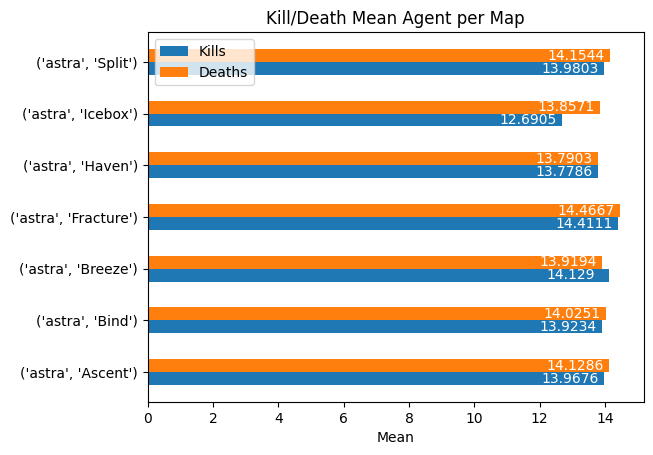

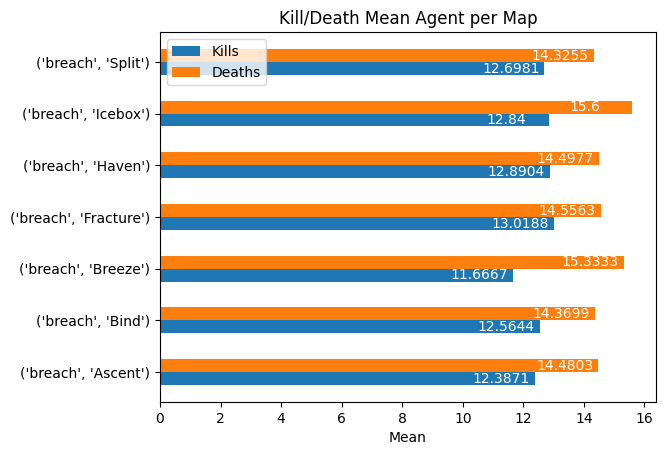

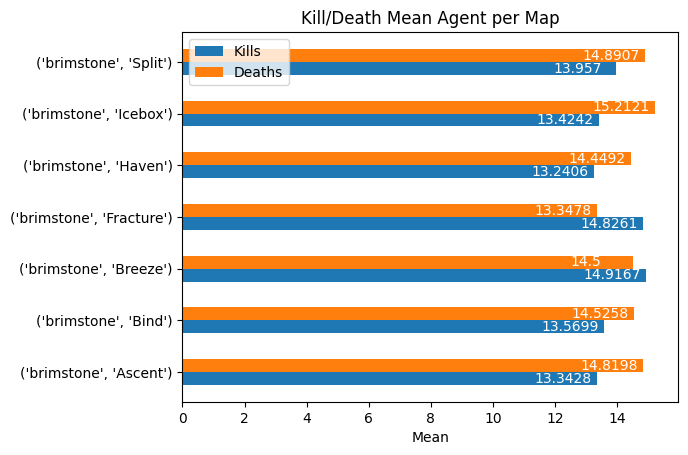

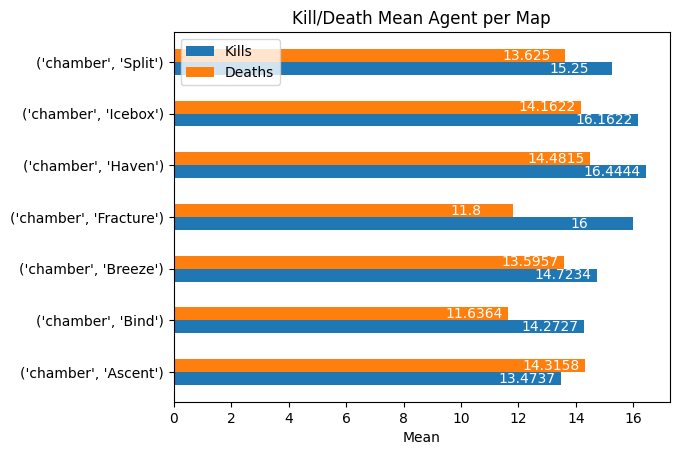

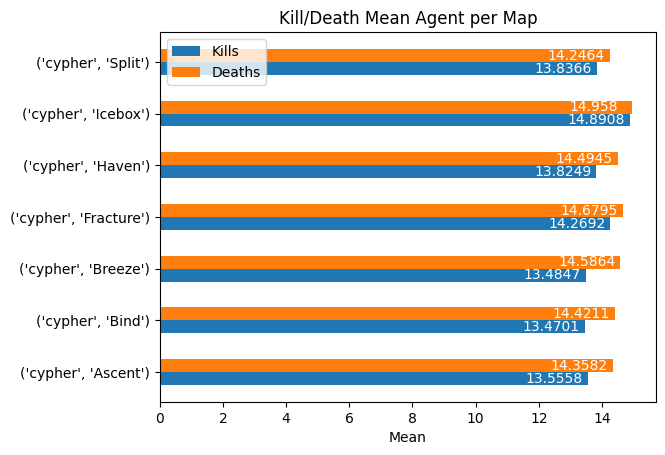

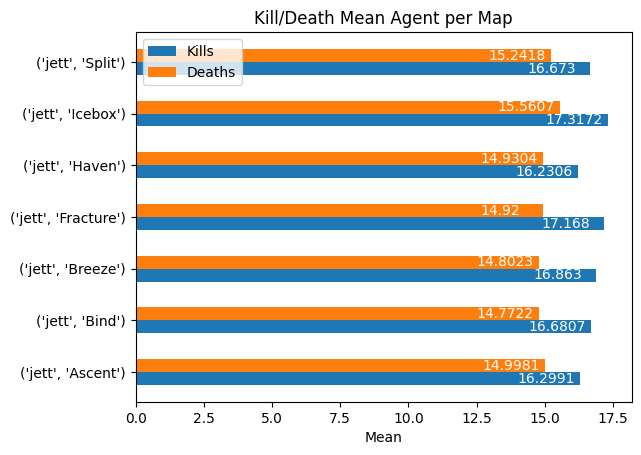

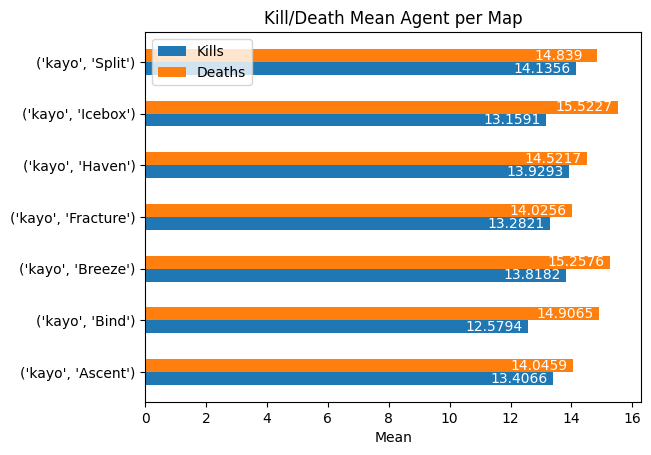

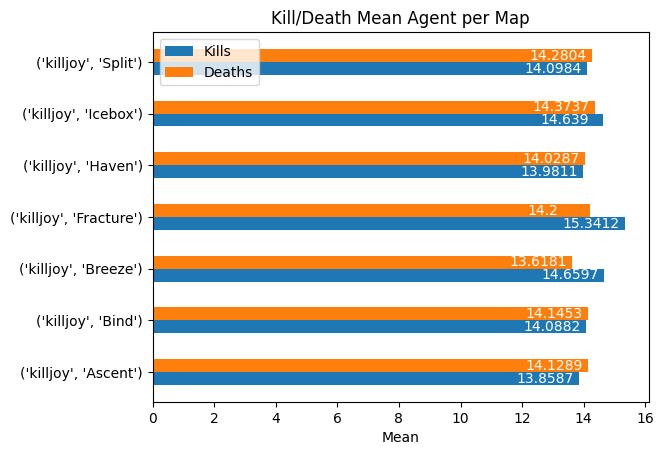

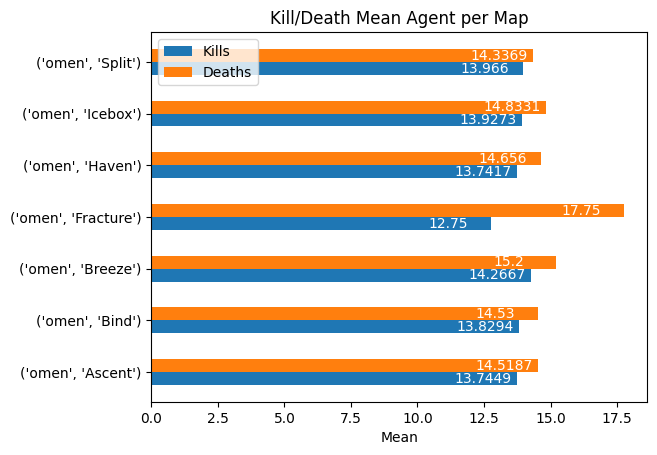

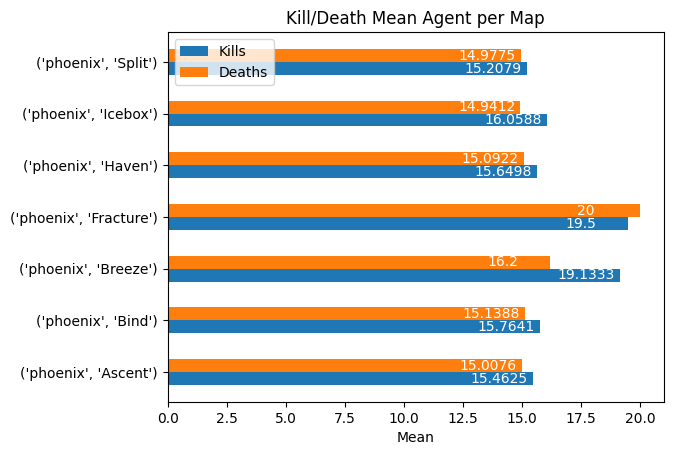

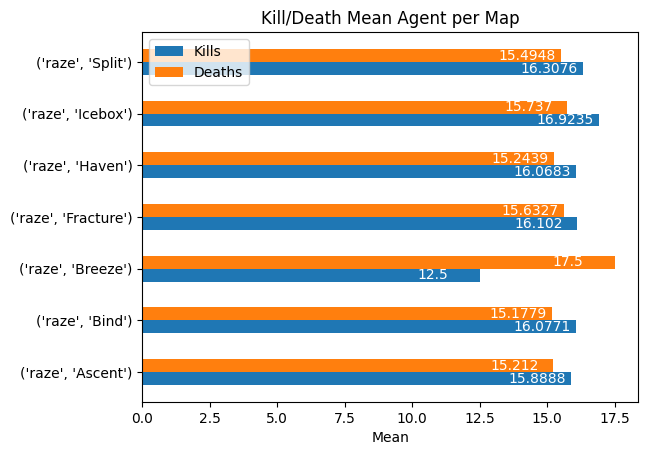

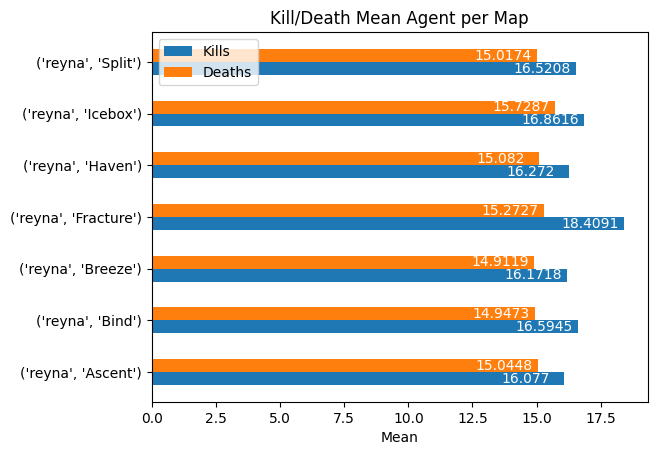

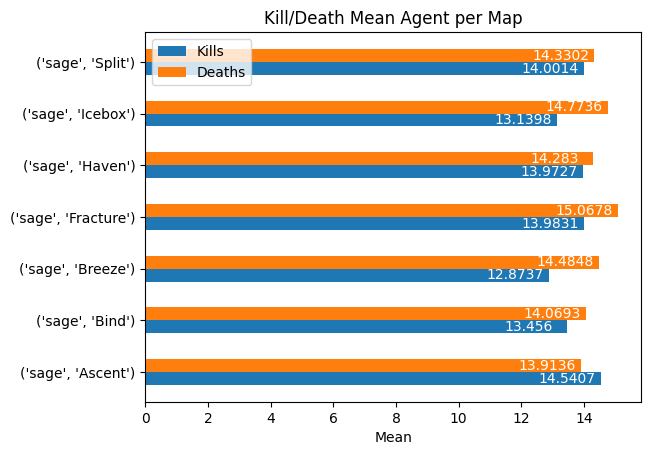

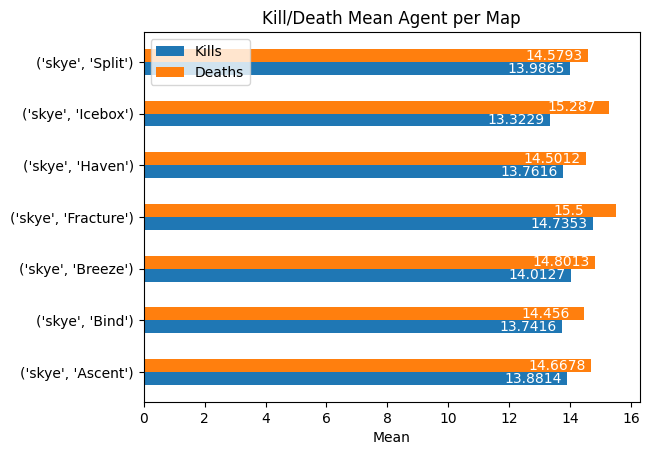

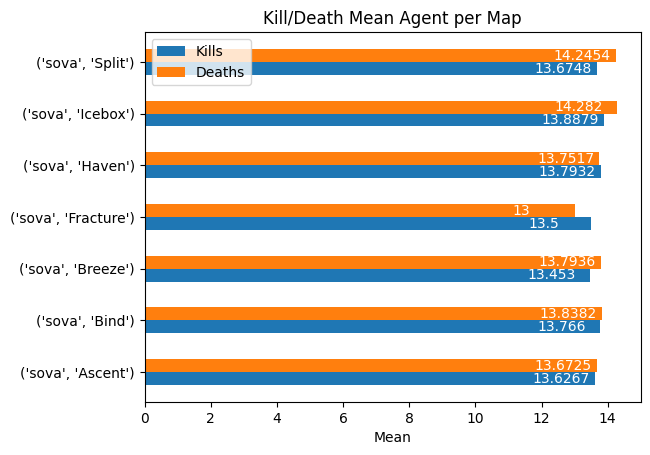

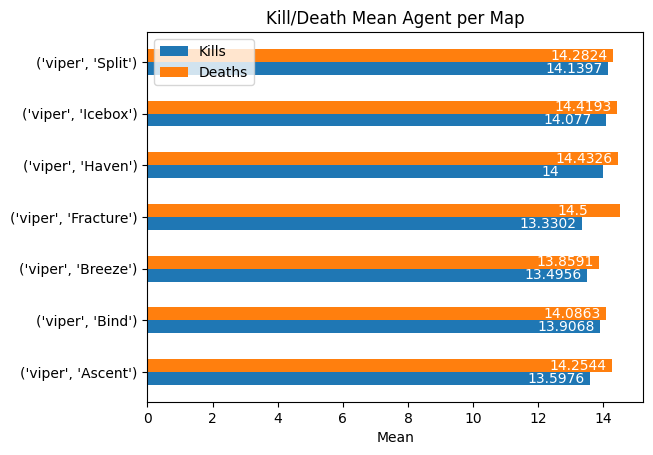

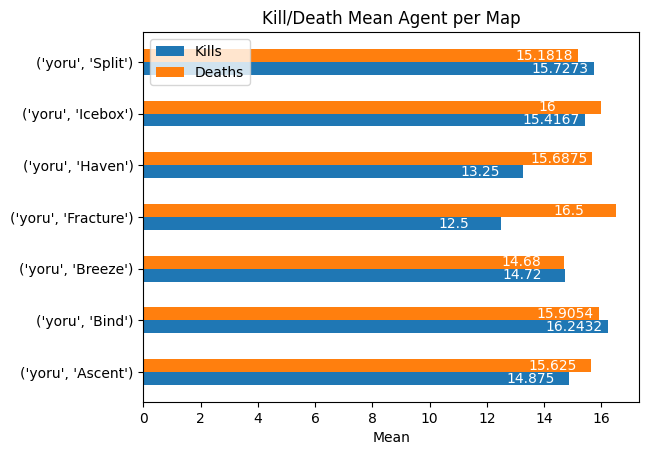

In [133]:
for i in range(0, tes.shape[0], 7):
    plot_Bar = tes.iloc[i:i+7]

    x = np.arange(len(plot_Bar.index))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()

    for attribute, measurement in plot_Bar.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=-45, color='white')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Mean')
    ax.set_title('Kill/Death Mean Agent per Map')
    ax.set_yticks(x + 0.125, plot_Bar.index)
    ax.legend(loc='upper left')

    plt.show()